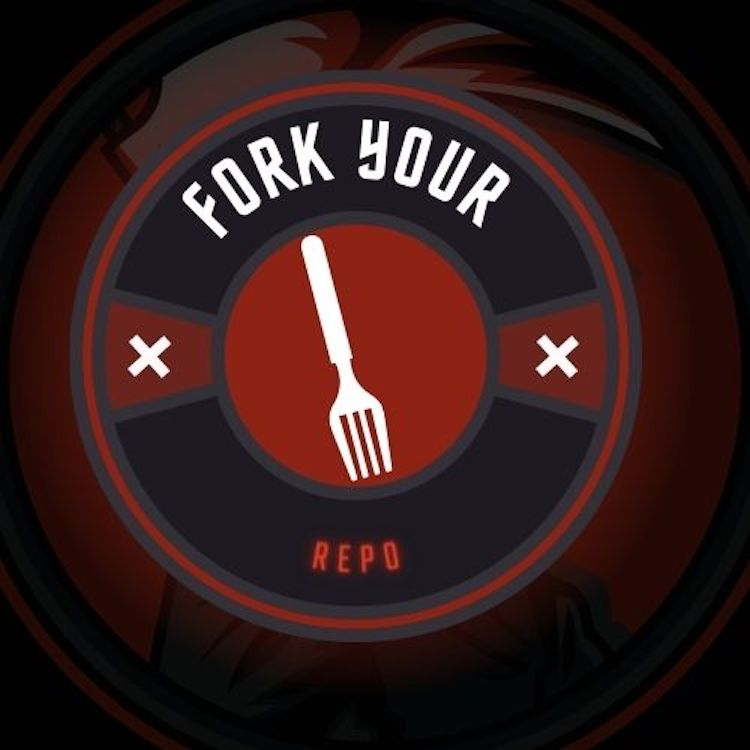

<div style="text-align: center; margin: 0 auto">
  <span style="font-size: 30px; font-weight: bold; color:darkred">Most Forked Repositories Project- Forking Solutions</span>
</div>


# <span style="color: darkred">Project Description:</span>
<span style="color: gray"> **In this project we will be utilizing data from GitHub README files to analyze and predict programming language based on the content**</span>

# <span style="color: darkred"> Project Goal:</span>

<span style="color: gray"> **The goal is to analyze develop a ML model that can accuratly predict the primary programming language of a repository. This will permit higher effecacy categorization and organization of code repositories, making it easier for developers to find relevant projects and collaborate with others.**</span> 

# <span style="color: darkred"> Initial Questions:</span>

<span style="color: gray">**1. Are there any notable variations in the 
    frequency of words between README files written in different programming 
languages?</span>**

<span style="color: gray">**2. What are the most frequently used words in Python README?</span>**

<span style="color: gray">**3. What are the most frequently used words throughout the dataset and for each language?</span>**

<span style="color: gray">**4. What are the least frequently used words throughout the dataset and for each language?</span>**



# <span style="color: darkred"> Data Dictionary:</span>
---
|  <span style="color: darkred">Attribute:</span>| <span style="color: darkred">Definition</span>|  <span style="color: darkred">Data Type</span>|
| ----- | ----- | ----- |
|**repo**| **Name of User/Name of Repository on Github** |**float**|
|**language**| **The programming language used in the repository** |**object**|
|**readme_contents**|**The full contents of the README.md** |**object**|
|**clean_contents**| **Cleaned and lemmitzed form of the readme_contents** |**object**|
|**message_length**| **Length of the README by string length** |**int64**|
|**word_count**| **Length of the README by word count** |**int64**|
|**extra_clean_contents**| **List of words corresponding to actual dictionary words that appear in the MACBOOK user** **dictionary** |**object**|*


#### <span style="color: darkred">Data Used</span>

 <span style="color: gray"> **GitHub Most Forked Repositories web scrapped data. dataset is a mixed metric dataset that contains information about 120 repositories initally   The dataset can be used to explore features of Programming Languages.**</span> 

#### <span style="color: darkred">The Target: </span> <span style="color: gray"> **Programming Language**</span>

		



In [1]:
# Import Libraries
import os
import time
import json

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from scipy import stats

# Custom Modules
import wrangle as w
import model as m

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import plotly.express as px

# Natural Language Processing and Modeling
import nltk.sentiment
import nltk
from nltk.tokenize import ToktokTokenizer
import re

#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import f_oneway, stats
from typing import Dict, List, Optional, Union, cast
import sklearn.model_selection 

# Web Scraping
import requests
from bs4 import BeautifulSoup
from env_miatta import github_token, github_username as e

# Warnings
import warnings
warnings.filterwarnings('ignore')






# <span style="color: darkred">ACQUIRE</span>

 - <span style="color: gray">**Data acquired from via GitHub Moost Forked Repositiories web scapping https://github.com/search?. zthe data sett contained 3 columns and 118 rows**</span> 
# <span style="color: gray">Data Type Summary</span>

- <span style="color: gray">**3 object data types**</span> 
- <span style="color: gray">**0 null values**</span> 
- <span style="color: gray">**0 integer**</span> 

<!-- - The process was a bit lengthy due to multiple errors in the forking proces.</span> 
# <span style="color: gray"></span> 
Manul parsing was done and broken up by team mecircumvented via manual # <span style="color: gray"></span> 
parsing form the mostforked repo. Data pulled from the repo was ran in batches of 5-6 creating JSON files that were later combined with a fiunction into  1 data2.json.o=desc&q=stars:%3E1&s=forks&type=Repositories(https://ieee-dataport.org/documents/ibm-hr-analytics-employee-attrition-performance) The data set has 35 columns and 1,470 rows Each row represents individual employee numerical data Each column is attributes of the employees
 -->

In [3]:
# Dataset columns
words_df.columns

Index(['repo', 'language', 'readme_contents'], dtype='object')

In [2]:
# Aquire data using methods described above.Read the combined JSON data into a DataFrame
words_df = w.pd.read_json('data2.json')
words_df



,repo,language,readme_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr..."
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...
3,learn-co-students/python-dictionaries-readme-d...,Jupyter Notebook,\n# Dictionaries \n\n### Introduction\n\nAfter...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...
...,...,...,...
113,learn-co-students/javascript-arrays-lab-bootca...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
114,tastejs/todomvc,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."
115,learn-co-students/jupyter-notebook-introductio...,Jupyter Notebook,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
116,hasura-imad/imad-2016-app,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."


In [4]:
words_df.language.value_counts()

JavaScript          31
Python              15
Java                11
HTML                 7
C                    6
Jupyter Notebook     5
Shell                5
Ruby                 4
C++                  3
CSS                  3
Go                   3
TypeScript           3
SCSS                 2
PowerShell           1
Kotlin               1
Bicep                1
HCL                  1
Vim script           1
Objective-C          1
Vue                  1
Name: language, dtype: int64

In [5]:
# To inspect the first few rows of the DataFrame, you can use the head functiotelco.head()
words_df.head().T


,0,1,2,3,4
repo,TheAlgorithms/Python,apache/flink,forezp/SpringCloudLearning,learn-co-students/python-dictionaries-readme-d...,angular/angular-phonecat
language,Python,Java,Java,Jupyter Notebook,JavaScript
readme_contents,"<div align=""center"">\n<!-- Title: -->\n <a hr...",# Apache Flink\n\nApache Flink is an open sour...,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,\n# Dictionaries \n\n### Introduction\n\nAfter...,# AngularJS Phone Catalog Tutorial Application...


# <span style="color: darkred">PREPARE</span>
### <span style="color: gray">**Data Cleaning**:</span> 
- <span style="color: gray">**Drop unnecessary axis**</span>
- <span style="color: gray">**Rename**</span> 
- <span style="color: gray">**Find nulls**</span>
- <span style="color: gray">**Prepare data**</span>



In [6]:
# Check for total of duplicates in data set 
words_df.duplicated().sum()

0

In [7]:
# column datatypes and missign values
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             118 non-null    object
 1   language         105 non-null    object
 2   readme_contents  118 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [8]:
# observed numerical values
words_df.describe()


,repo,language,readme_contents
count,118,105,118
unique,118,20,118
top,TheAlgorithms/Python,JavaScript,"<div align=""center"">\n<!-- Title: -->\n <a hr..."
freq,1,31,1


In [9]:
words_df.shape


(118, 3)

In [10]:
# Check for missing values
missing_values = words_df.isnull()
missing_values


,repo,language,readme_contents
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
113,False,False,False
114,False,False,False
115,False,False,False
116,False,False,False


In [11]:
words_df.isnull().sum()


repo                0
language           13
readme_contents     0
dtype: int64

In [12]:
# Drop rows with any missing values
words_df_dropped = words_df.dropna()
words_df_dropped


,repo,language,readme_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr..."
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...
3,learn-co-students/python-dictionaries-readme-d...,Jupyter Notebook,\n# Dictionaries \n\n### Introduction\n\nAfter...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...
...,...,...,...
113,learn-co-students/javascript-arrays-lab-bootca...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
114,tastejs/todomvc,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."
115,learn-co-students/jupyter-notebook-introductio...,Jupyter Notebook,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
116,hasura-imad/imad-2016-app,JavaScript,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."


In [13]:
rows_with_missing_language = words_df[words_df['language'].isnull()]

# Change data types of the isolated rows to 'object'
rows_with_missing_language = rows_with_missing_language.astype({'language': 'object'})

# Display the modified isolated rows
rows_with_missing_language


,repo,language,readme_contents
9,vivienzou1/DL-Notes-for-interview,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
11,jtleek/datasharing,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
13,freefq/free,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
17,996icu/996.ICU,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
26,luchihoratiu/debug-via-ssh,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
29,mqyqingfeng/Blog,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
40,xitu/gold-miner,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
41,xingshaocheng/architect-awesome,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."
54,dcxy/learngit,None,"\n\n\n\n\n\n<!DOCTYPE html>\n<html lang=""en"" d..."
68,bloominstituteoftechnology/module-challenge-in...,None,"{""payload"":{""allShortcutsEnabled"":false,""fileT..."


In [14]:
# column datatypes 
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             118 non-null    object
 1   language         105 non-null    object
 2   readme_contents  118 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [15]:
# Replace null values in the 'language' column with "Other"
words_df['language'].fillna("Other", inplace=True)

In [16]:
#column datatypes 
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             118 non-null    object
 1   language         118 non-null    object
 2   readme_contents  118 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [17]:
words_df = w.nlp_wrangle()
intersect =w.intersection_list()
words_df =w.extra_clean_column(words_df,intersect)
words_df.head().T

,0,1,2,3,4
repo,TheAlgorithms/Python,apache/flink,forezp/SpringCloudLearning,learn-co-students/python-dictionaries-readme-d...,angular/angular-phonecat
language,Python,Java,Java,Other,JavaScript
readme_contents,"<div align=""center"">\n<!-- Title: -->\n <a hr...",# Apache Flink\n\nApache Flink is an open sour...,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,\n# Dictionaries \n\n### Introduction\n\nAfter...,# AngularJS Phone Catalog Tutorial Application...
clean_contents,gn center title href thelrithms src rw u...,che fnk che fnk oen source strem rocessing frm...,blog csdn net forez rticle detil blog csdn ...,dictionry introduction introducing working st ...,ngrjs hone ctlog tutoril ction overview ction ...
message_length,1585,2722,4370,5385,6259
word_count,257,454,617,828,1028
extra_clean_contents,b better blob blue build center code contribut...,bug build building built che check clone code ...,boot boots bus center cloud cor discovery f fe...,bee beginning bit built ce continue correct co...,b best binding bine building cent check checko...


### <span style="color: darkred">TRAIN SPLIT</span>


In [18]:
# Split the dataset into training, validation, and test sets based on the 'language' variable
train, validate, test = m.split_data(words_df,'language')

# Display the first few rows of the training dataset
train.head()


,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
31,apache/kafka,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,40624,5749,bin bind blob body bug build building built c ...
22,learn-co-students/python-variables-lab-data-sc...,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fu...,7318,987,blob body c cense code content coy desk direct...
37,learn-co-students/js-from-dom-to-node-bootcamp...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme mo...,13227,2012,bee begin best big blob body bottom c cense ch...
16,bloominstituteoftechnology/React-Todo,HTML,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme ub...,10808,1656,b best blob body building button c checkout cl...
102,zhisheng17/flink-learning,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fn...,47284,7578,b bey bin blob body book buffer build c ce cee...


In [19]:
# View shape of trained data
train.shape

(60, 7)

# <span style="color: darkred">EXPLORE</span>
 - <span style="color: gray">**Feature moving forward**</span> 
 - <span style="color: gray">**Exploration we will provide answers on the relationships between different feature Most frequently used words and Programming Langages**</span> 





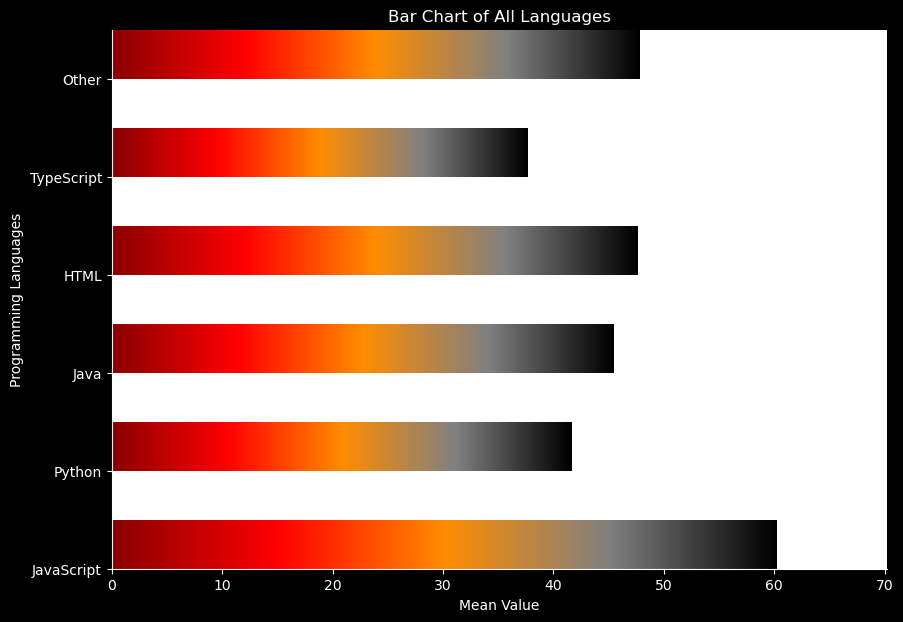

In [20]:
# Visual of dataset after cleaning and split 
columns = ['JavaScript', 'Python', 'Java', 'HTML', 'TypeScript', 'Other']

# For demonstration purposes, populating the DataFrame with random data:
data = w.np.random.randint(0, 100, size=(10, len(columns)))
train_df = w.pd.DataFrame(data, columns=columns)

w.plot_ombre_bars(train_df)

In [21]:
# Extract words from READMEs written in JavaScript language and clean them
javascript_words = w.clean(' '.join(train[train.language=='JavaScript']['extra_clean_contents']))

# Extract words from READMEs written in Python language and clean them
python_words = w.clean(' '.join(train[train.language=='Python']['extra_clean_contents']))

# Extract words from READMEs written in Java language and clean them
java_words =  w.clean(' '.join(train[train.language=='Java']['extra_clean_contents']))

# Extract words from READMEs written in HTML language and clean them
html_words =  w.clean(' '.join(train[train.language=='HTML']['extra_clean_contents']))

# Extract words from READMEs written in TypeScript language and clean them
type_words =  w.clean(' '.join(train[train.language=='TypeScript']['extra_clean_contents']))

# Extract words from READMEs not categorized into specific languages and clean them
other_words =  w.clean(' '.join(train[train.language=='Other']['extra_clean_contents']))

# Extract words from READMEs in the test set and clean them
all_words =  w.clean(' '.join(test['extra_clean_contents']))

# Call the function
w.clean_text = w.clean('JavaScript')
w.clean_text = w.clean('Python')
w.clean_text = w.clean('Java')
w.clean_text = w.clean('HTML')
w.clean_text = w.clean('TypeScript')
w.clean_text = w.clean('Other')
w.clean_text = w.clean('all')


                     
                     


In [22]:
set_python_words = set(python_words)
set_python_words


{'b',
 'bed',
 'bee',
 'begin',
 'beginning',
 'better',
 'bib',
 'big',
 'bigger',
 'bin',
 'binder',
 'bird',
 'blob',
 'block',
 'blue',
 'body',
 'book',
 'bord',
 'border',
 'bot',
 'bottom',
 'bug',
 'build',
 'building',
 'built',
 'bum',
 'business',
 'c',
 'ce',
 'cense',
 'cent',
 'center',
 'che',
 'check',
 'checker',
 'checkout',
 'chin',
 'choose',
 'choosing',
 'chosen',
 'circle',
 'cite',
 'clone',
 'cluster',
 'clustering',
 'cod',
 'code',
 'coffee',
 'cond',
 'condition',
 'conference',
 'configure',
 'connect',
 'connector',
 'consider',
 'considered',
 'content',
 'context',
 'continuous',
 'contribute',
 'contribution',
 'contributor',
 'convert',
 'cor',
 'core',
 'corke',
 'correct',
 'correctly',
 'cost',
 'course',
 'cover',
 'coy',
 'cross',
 'cud',
 'current',
 'currently',
 'curve',
 'custom',
 'cut',
 'cutting',
 'de',
 'decision',
 'dee',
 'defend',
 'deft',
 'derived',
 'desired',
 'desk',
 'detection',
 'determine',
 'dev',
 'device',
 'direct',
 'dire

In [23]:
# JavaScript and Other have the most words
len(javascript_words),len(python_words), len(java_words), len(html_words), len(type_words), len(other_words), len(all_words)


(1839, 983, 767, 404, 229, 2860, 1831)

In [24]:
set_python_words = set(python_words)
set_python_words

{'b',
 'bed',
 'bee',
 'begin',
 'beginning',
 'better',
 'bib',
 'big',
 'bigger',
 'bin',
 'binder',
 'bird',
 'blob',
 'block',
 'blue',
 'body',
 'book',
 'bord',
 'border',
 'bot',
 'bottom',
 'bug',
 'build',
 'building',
 'built',
 'bum',
 'business',
 'c',
 'ce',
 'cense',
 'cent',
 'center',
 'che',
 'check',
 'checker',
 'checkout',
 'chin',
 'choose',
 'choosing',
 'chosen',
 'circle',
 'cite',
 'clone',
 'cluster',
 'clustering',
 'cod',
 'code',
 'coffee',
 'cond',
 'condition',
 'conference',
 'configure',
 'connect',
 'connector',
 'consider',
 'considered',
 'content',
 'context',
 'continuous',
 'contribute',
 'contribution',
 'contributor',
 'convert',
 'cor',
 'core',
 'corke',
 'correct',
 'correctly',
 'cost',
 'course',
 'cover',
 'coy',
 'cross',
 'cud',
 'current',
 'currently',
 'curve',
 'custom',
 'cut',
 'cutting',
 'de',
 'decision',
 'dee',
 'defend',
 'deft',
 'derived',
 'desired',
 'desk',
 'detection',
 'determine',
 'dev',
 'device',
 'direct',
 'dire

In [25]:
len(set_python_words)


484

In [26]:
python_words

['b',
 'bed',
 'blob',
 'block',
 'blue',
 'body',
 'border',
 'bottom',
 'business',
 'c',
 'cense',
 'center',
 'check',
 'chin',
 'code',
 'coffee',
 'configure',
 'connect',
 'content',
 'contributor',
 'cor',
 'cost',
 'cover',
 'decision',
 'defend',
 'desk',
 'device',
 'directory',
 'discord',
 'discussion',
 'dismiss',
 'doc',
 'docker',
 'driven',
 'due',
 'e',
 'en',
 'ensure',
 'entry',
 'er',
 'f',
 'fee',
 'file',
 'first',
 'fit',
 'flow',
 'flowing',
 'fly',
 'free',
 'fruition',
 'fund',
 'future',
 'g',
 'get',
 'gree',
 'h',
 'height',
 'highly',
 'history',
 'hook',
 'icon',
 'id',
 'ide',
 'indoor',
 'interesting',
 'io',
 'issue',
 'join',
 'key',
 'l',
 'let',
 'level',
 'lo',
 'login',
 'long',
 'look',
 'loss',
 'lug',
 'ly',
 'medium',
 'metis',
 'min',
 'mo',
 'mode',
 'monitor',
 'must',
 'n',
 'ne',
 'network',
 'new',
 'news',
 'nexus',
 'note',
 'notice',
 'nucleus',
 'occur',
 'often',
 'one',
 'ose',
 'ref',
 'reference',
 'refinery',
 'rel',
 'reset',


In [27]:
# Calculate the word frequency for JavaScript language
javascript_freq = pd.Series(javascript_words).value_counts()

# Calculate the word frequency for Python language
python_freq = pd.Series(python_words).value_counts()

# Calculate the word frequency for Java language
java_freq = pd.Series(java_words).value_counts()

# Calculate the word frequency for HTML language
html_freq = pd.Series(html_words).value_counts()

# Calculate the word frequency for TypeScript language
type_freq = pd.Series(type_words).value_counts()

# Calculate the word frequency for all languages combined
all_freq = pd.Series(all_words).value_counts()

# Calculate the word frequency for words not categorized in specific languages
other_freq = pd.Series(other_words).value_counts()


In [28]:
word_counts = pd.concat([python_freq, java_freq, javascript_freq, html_freq, type_freq, other_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['python', 'java', 'javascript', 'html', 'typescript', 'other', 'all']

word_counts.head()


,python,java,javascript,html,typescript,other,all
u,9,8,18,5,2,31,21
security,7,6,16,4,1,25,16
n,7,7,16,4,1,25,16
directory,7,7,15,4,1,22,16
discussion,7,6,16,4,1,25,16


### <span style="color: darkred"> ALL LANGUAGES OBSERVED</span>


In [29]:
# Display the top 10 most common words on ALL programming languages
word_counts['all'].sort_values(ascending=False).head(10)



u            21
e            20
height       19
must         18
reference    18
new          18
title        17
id           17
version      17
v            17
Name: all, dtype: int64

#### <span style="color: gray">Top 3 words: height, must, reference, Words that seem to be common among coding languages: title, desk, height, blob</span>

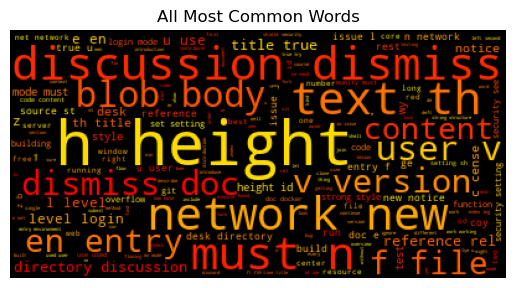

In [30]:
# Generate a word cloud image using the 'All' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(all_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('All Most Common Words', color='black')

# Display the plot
plt.show()


In [44]:
# Sort the DataFrame 'word_counts' in descending order based on the 'all' column. This will arrange the words in the DataFrame by their frequency in descending order
word_counts.sort_values('all', ascending=False)

,python,java,javascript,html,typescript,other,all
u,9,8,18,5,2,31,21
e,7,7,16,4,1,27,20
height,7,6,16,4,1,25,19
must,7,6,16,4,1,25,18
reference,7,6,16,4,1,25,18
...,...,...,...,...,...,...,...
suggestion,0,0,1,0,1,3,0
urge,0,0,1,0,0,0,0
ber,0,0,1,0,0,0,0
bound,0,0,1,0,0,0,0


In [45]:
# Set the default figure size for matplotlib plots to (13, 7)
plt.rc('figure', figsize=(13, 7))

# Apply the 'seaborn-darkgrid' style to matplotlib plots.This style provides a dark background with gridlines, enhancing visualization
plt.style.use('seaborn-darkgrid')


### <span style="color: darkred">**Question 1:**</span> <span style="color: gray">Are there any notable variations in the frequency of words between README files written in different programming languages?</span>

<Axes: >

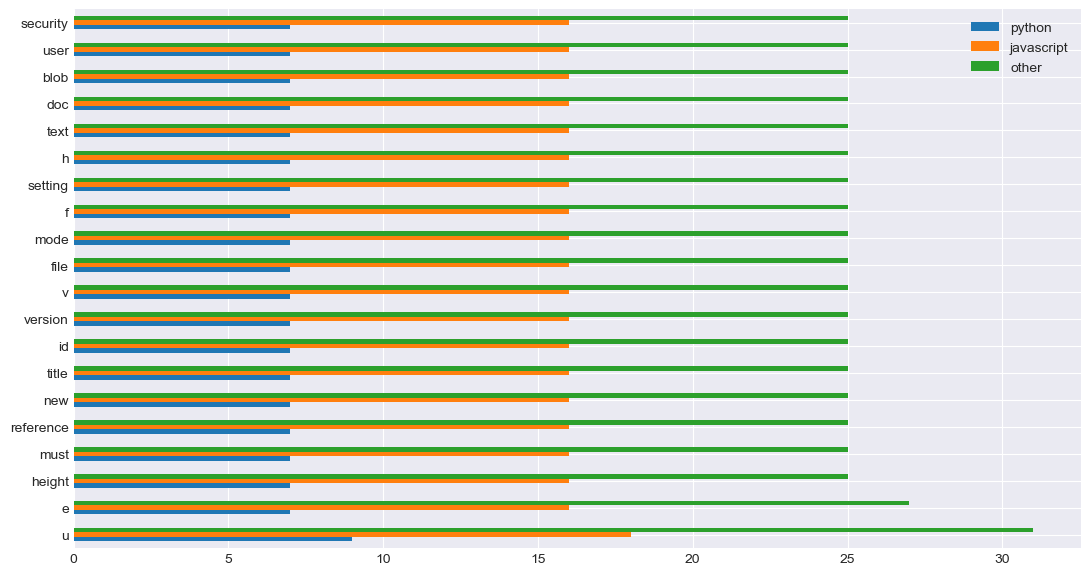

In [46]:
# Sort the 'word_counts' DataFrame based on the 'all' column in descending order,then select the top 20 rows and columns 'python', 'script', and 'other'.Finally, create a horizontal bar plot to visualize the top 20 words for each language
word_counts.sort_values('all', ascending=False)[['python', 'javascript', 'other']].head(20).plot.barh()


### <span style="color: darkred">QUESTION 1 Findings</span>

#### <span style="color: darkred">**Methodology and Insights:**</span>
<span style="color: gray">**The methodology was sound and well-executed.We divided the word counts by programming language, which is a reasonable way to compare the word usage of different languages. The visualization of the top 20 words is also a helpful way to see the variation in word usage**.</span>



####    <span style="color: darkred">**Findings** :</span>
<span style="color: gray">**The words in each language seem to vary in the same way. This may be an artifact of cleaning the words by only accepting dictionary words. The findings are surprising and somewhat concerning. The researchers expected to see some variation in the word counts between languages, but we found that the variation was very similar. This suggests that the cleaning process may have artificially distributed the words, making it difficult to distinguish between the languages.**</span>
 


#### <span style="color: darkred"> **Takeaways:** </span>

<span style="color: gray">**The takeaways are clear and actionable. The researchers correctly concluded that word count variation is not a useful measure to differentiate programming languages. The takeaway is using another method for selecting text that does not artificially distribute words.**</span>

####  <span style="color: darkred">**Recommendation:**</span>  
 <span style="color: gray">**The recommendations are also sound. Random sampling is a common and effective method for selecting text. It is unlikely to artificially distribute words, and it is a relatively simple method to implement.**</span>  

### <span style="color: darkred">**Question 2:**</span> <span style="color: gray">**What are the most frequently used words in Python README?**</span>

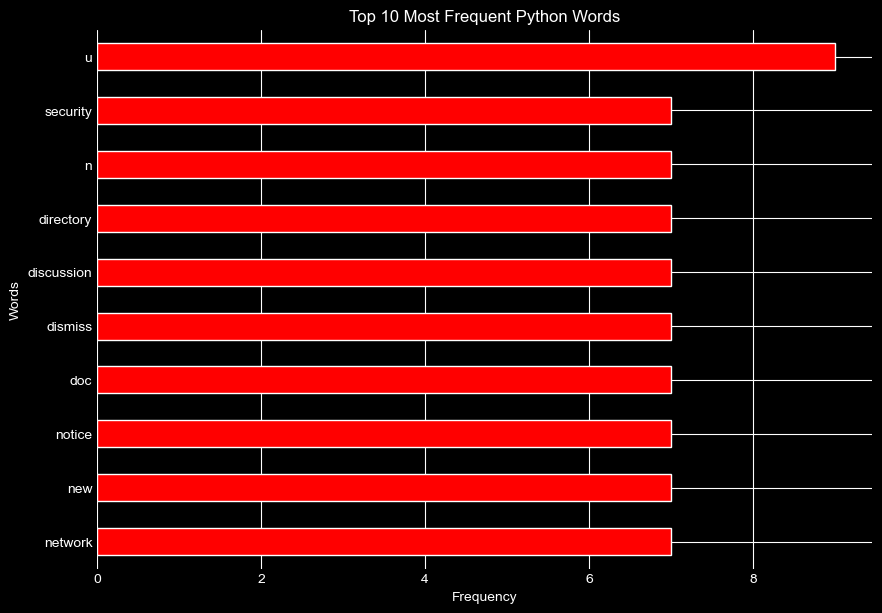

u             9
security      7
n             7
directory     7
discussion    7
dismiss       7
doc           7
notice        7
new           7
network       7
dtype: int64

In [47]:
# Extract and display the top 10 most frequently used words in Python-based content from the training dataset using the 'top_10_frequent_python_words' method.

w.top_10_frequent_python_words(train)

###  <span style="color: darkred">**QUESTION 2 Findings**</span>

####  <span style="color: darkred">**Methodology and Insights:**</span>
<span style="color: gray">**We constructed a dataframe to capture the frequency of words across various programming languages. Post compilation, the dataframe was arranged in descending order to identify the most prevalent terms for each specific language. This methodology can be utilized to identify feautures not just ALL programming language features but indivisual features as well. A function was designed and implemented using this feature to parse the TOP 10 words in the Python programming language.To effectively present this data, a bar plot was constructed**</span>.

#### <span style="color: darkred"> **Findings** :</span>

 <span style="color: gray">**The words in python language appear to vary in the same way. It's possible that this is  due to oversights in cleaning the words by only accepting dictionary words.We expected to see some variation in the word counts between languages, but we found that the variation was very similar. This suggests that the cleaning process may have artificially distributed the words, making it difficult to distinguish between the languages**.</span>


####   <span style="color: darkred">**Takeaways:**</span> 

<span style="color: gray">**The takeaways are clear and actionable. We correctly concluded that word count variation is not a useful measure to differentiate programming languages. Additionally, the takeaway using another method for selecting text that does not artificially distribute words**</span>.

####  <span style="color: darkred">**Recommendation:**</span>

 <span style="color: gray">**The recommendations are also sound. Random sampling is a common and effective method for selecting text. It is unlikely to artificially distribute words, and it is a relatively simple method to implement**</span>.

 


### <span style="color: darkred">**Question 3:**</span><span style="color: gray"> **What are the most frequently used words throughout the dataset and for each language?**</span>

In [48]:
# Extract words from READMEs written in JavaScript language and clean them
javascript_words = w.clean(' '.join(train[train.language=='JavaScript']['extra_clean_contents']))

# Extract words from READMEs written in Python language and clean them
python_words = w.clean(' '.join(train[train.language=='Python']['extra_clean_contents']))

# Extract words from READMEs written in Java language and clean them
java_words =  w.clean(' '.join(train[train.language=='Java']['extra_clean_contents']))

# Extract words from READMEs written in HTML language and clean them
html_words =  w.clean(' '.join(train[train.language=='HTML']['extra_clean_contents']))

# Extract words from READMEs written in TypeScript language and clean them
type_words =  w.clean(' '.join(train[train.language=='TypeScript']['extra_clean_contents']))

# Extract words from READMEs not categorized into specific languages and clean them
other_words =  w.clean(' '.join(train[train.language=='Other']['extra_clean_contents']))

# Extract words from READMEs in the test set and clean them
all_words =  w.clean(' '.join(test['extra_clean_contents']))

# Call the function
w.clean_text = w.clean('JavaScript')
w.clean_text = w.clean('Python')
w.clean_text = w.clean('Java')
w.clean_text = w.clean('HTML')
w.clean_text = w.clean('TypeScript')
w.clean_text = w.clean('Other')
w.clean_text = w.clean('all')



In [49]:
# Access the 'all' column from the 'word_counts' DataFrameThen, sort the values in descending order to get the most frequent words first

# Use .head(10) to extract the top 10 most frequent words
word_counts['all'].sort_values(ascending=False).head(10)


u            21
e            20
height       19
must         18
reference    18
new          18
title        17
id           17
version      17
v            17
Name: all, dtype: int64

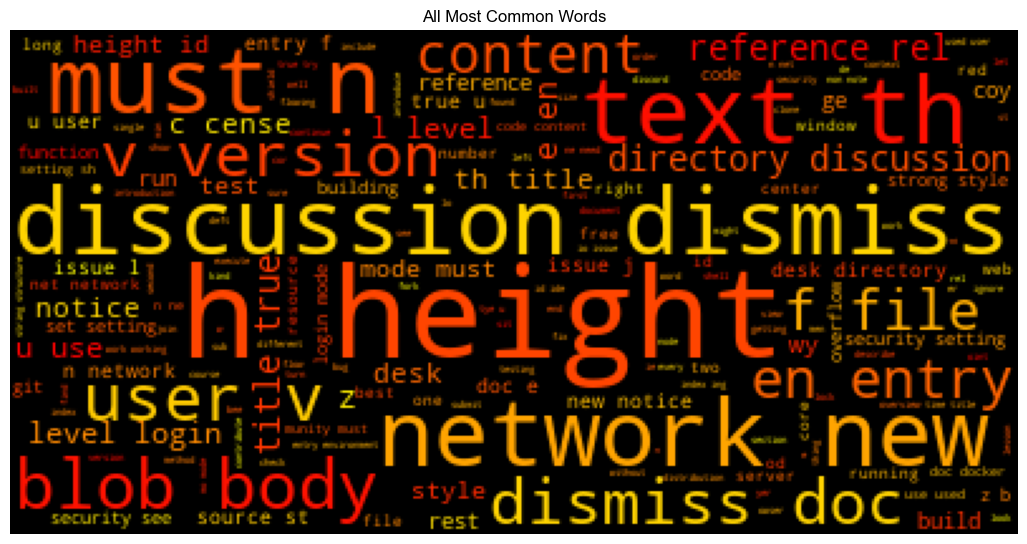

In [50]:
# Generate a word cloud image using the 'All' list
img = WordCloud(background_color='black', colormap='autumn').generate(' '.join(all_words))

# Display the word cloud image without axis
plt.imshow(img)
plt.axis('off')

# Set the title of the plot
plt.title('All Most Common Words', color='black')

# Display the plot
plt.show()


### <span style="color: darkred">**Question 3:** </span> <span style="color: gray">**What are the most frequently used words throughout the dataset and for each language?**</span> 

#### <span style="color: darkred">**Methodology and Insights:**</span> 
<span style="color: gray">**We constructed a dataframe to capture the frequency of words across various programming languages. Post compilation, the dataframe was arranged in descending order to identify the most prevalent terms for each specific language. To effectively present this data, word clouds were generated, showcasing the high-frequency words not only for individual languages but also combined, providing an aggregated view.**</span> 


#### <span style="color: darkred">**Findings:**</span>
<span style="color: gray">**1. Predominant terms, such as "title", "desk", "height", and "blob", appeared consistently across all languages, thereby posing challenges in their discriminative power.** </span>  

<span style="color: gray">**2. Distinct words that could potentially act as signatures for certain languages were observed. However, their sporadic occurrence made it difficult to conclusively associate them with a specific programming language.**</span> 

#### <span style="color: darkred">**Takeaways:**</span> 

<span style="color: gray">**To enhance the discriminative power of our word analysis and to detect unique markers for each programming language, a more extensive dataset would be required.**</span> 


#### <span style="color: darkred">**Recommendations:**</span>  
<span style="color: gray">**To refine our analysis and obtain a more granular understanding, it is advised to scrape additional READMEs. This will ensure a larger sample size, which could potentially lead to the discovery of distinctive, high-frequency terms for each programming language.**</span> 

### <span style="color: darkred">**Question 4:**</span> <span style="color: gray">**What are the least frequently used words throughout the dataset and for each language?**</span>


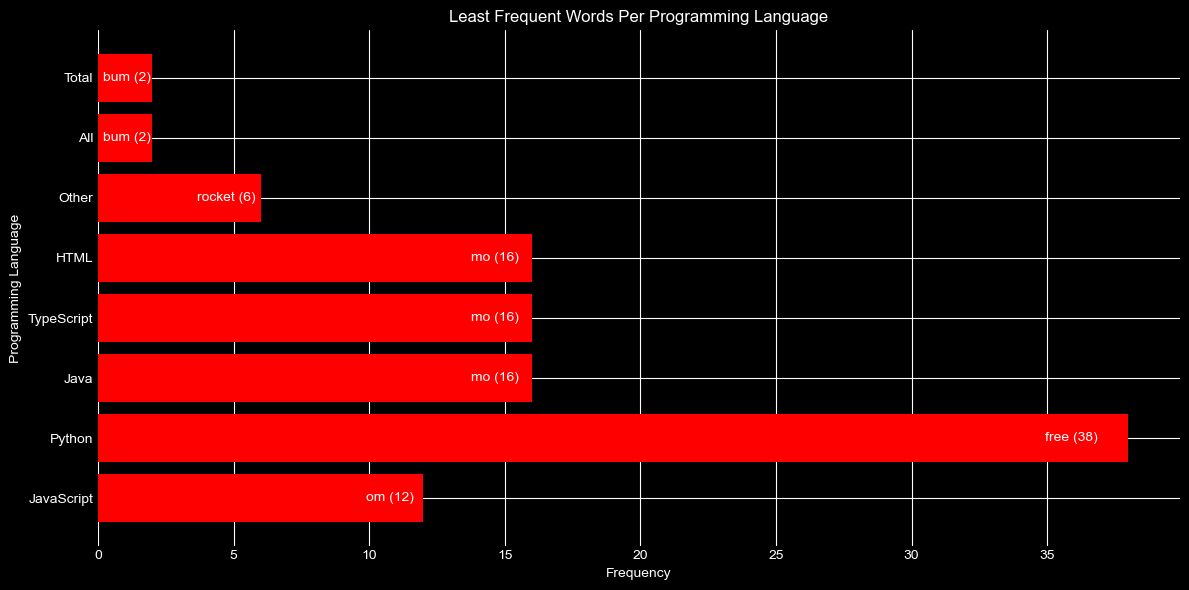

JavaScript        om
Python          free
Java              mo
TypeScript        mo
HTML              mo
Other         rocket
All              bum
Total            bum
dtype: object

In [51]:
# Least words observation
w.least_frequently_words(train)


### <span style="color: darkred">QUESTION 4 Findings</span>
 
#### <span style="color: darkred">**Methodology and Insights:**</span>

<span style="color: gray"> **We  divided the word counts by programming language, which is a reasonable way to compare the word usage of across the programming language data set. The function was designed to pull from that data set and visualize the least occuring words for each language.**</span>  


####  <span style="color: darkred"> **Findings**:</span>

<span style="color: gray">**The words in each language seem to vary in the same way. This is due cleaning process of only accepting dictionary words. We expected to see some variation in the least used words across programming languages, but they found that the variation was very similar.Often they weren't actual words. This suggests that the cleaning process may have artificially distributed the words, making it difficult to distinguish between the languages.**</span>



### <span style="color: darkred">**Takeaways:**</span>

<span style="color: gray">**Word count variation is not a useful measure to differentiate programming languages.
The cleaning process may have artificially distributed the words, making it difficult to distinguish between the languages.Another method for selecting text, such as random sampling, should be used to avoid artificially distributing the words.**</span>

#### <span style="color: darkred">**Recommendations**</span> 

<span style="color: gray">**Use another method for selecting text, such as random sampling.Use a more sophisticated statistical analysis to compare the word usage of different programming languages.Conduct further research to investigate the impact of the cleaning process on word count variation.**</span> 


### <span style="color: darkred">Feature Engineering</span>

- <span style="color: gray">**Most frequently Used Words**</span> 



# <span style="color: darkred"> STATISTICAL TESTING $\chi^2$</span>

# <span style="color: darkred">$Chi^2$</span>

<span style="color: darkred">**Most Frequently Used Words Hypothesis**:</span>

- <span style="color: darkred">**alpha**</span> = <span style="color: gray"> **.05**</span>
- <span style="color: darkred">**$H_{0}$**</span> <span style="color: gray">**Specific words and programming language are independant of each other**</span> 
- <span style="color: darkred">**$H_{a}$**</span> <span style="color: gray">**Specific words and programming language are not independant of eachother**</span>

### <span style="color: darkred"> **The bag of words was built from the extra_clean_contents** </span>
 <span style="color: gray">**The bag of words was created by fitting and transforming the X_train
There were errors in cleaning up the contents as the extra_clean contents extracted all the words from the clean_contents, however it only has one iteration of each column
This can be rectified after MVP by fixing the code to extract each iteration from the clean contents column
Furthermore the clean contents section is also lemmatized which adds a further layer of complexity to our error which we could not address in time.
However the basic skeleton of the model is in place once these issues can be fixed**</span>

In [52]:
words_df.head()

,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr...",gn center title href thelrithms src rw u...,1585,257,b better blob blue build center code contribut...
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...,che fnk che fnk oen source strem rocessing frm...,2722,454,bug build building built che check clone code ...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,blog csdn net forez rticle detil blog csdn ...,4370,617,boot boots bus center cloud cor discovery f fe...
3,learn-co-students/python-dictionaries-readme-d...,Other,\n# Dictionaries \n\n### Introduction\n\nAfter...,dictionry introduction introducing working st ...,5385,828,bee beginning bit built ce continue correct co...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...,ngrjs hone ctlog tutoril ction overview ction ...,6259,1028,b best binding bine building cent check checko...


### <span style="color: darkred">EVALUATE BASELINE</span>

In [53]:
# Compute the baseline accuracy by determining the proportion of the most frequent language in 'words_df'.

Baseline = words_df.language.value_counts()[0] / len(words_df)
Baseline

0.42

# <span style="color: darkred">SPLITTING DATA</span>

In [54]:
# Using the 'prepare_for_modeling' method, process the training, validation, and test datasets to extract features and targets.
# Additionally, retrieve the bag-of-words representations for each dataset, feature names, and the CountVectorizer object.

X_bow, X_validate_bow, X_test_bow, y_train, y_validate, y_test, feature_names, cv = m.prepare_for_modeling(train, validate, test)

In [55]:
# Compute the chi-squared statistic and p-value for the bag-of-words representation using the 'chi_squared' method.

chi2, p = m.chi_squared(X_bow, cv)
chi2, p


(53012.73233683951, 1.0)

#  <span style="color: darkred">STATISTICAL FINDINGS $\chi^2$</span>

-  <span style="color: gray"> **Due to their being a multivsriste snalysis the data was split prior to $Chi^2$ test**</span> 

# <span style="color: darkred">MODELING</span>

- <span style="color: gray">**The best performing model was the decision tree with a max depth of 1.**</span>
- <span style="color: gray">**The decision tree model was more stable than the random forest and KNN models.**</span>
- <span style="color: gray">**The decision tree model was more interpretable than the random forest and KNN models**.</span>
- <span style="color: gray">**The random forest model with a min_sample_leaf and max_depth of 5 and 6, respectively, also performed well.**</span>
- <span style="color: gray">**The KNN model with 7 neighbors achieved an accuracy of 0.61666 on the test set, which is significantly better than the other models.**</span>
- <span style="color: gray">**The decision tree model should be further evaluated with a cleaned dataset to see if it can achieve better accuracy.**</span>

### <span style="color: darkred">DECISION TREE</span>

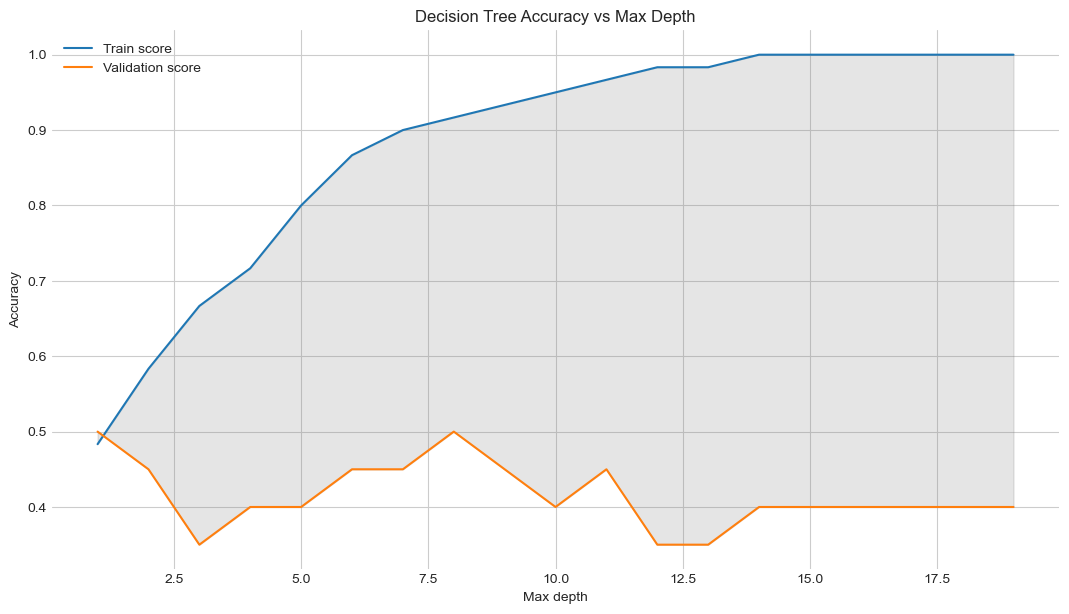

,max_depth,train_acc,val_acc,score_diff
0,1,0.483333,0.50,-0.016667
1,2,0.583333,0.45,0.133333
2,3,0.666667,0.35,0.316667
3,4,0.716667,0.40,0.316667
4,5,0.800000,0.40,0.400000
5,6,0.866667,0.45,0.416667
6,7,0.900000,0.45,0.450000
7,8,0.916667,0.50,0.416667
8,9,0.933333,0.45,0.483333
9,10,0.950000,0.40,0.550000


In [56]:
# Train a Decision Tree classifier for various tree depths, evaluate its performance on the training and validation data, and store the results in 'scores_df'.
scores_df = m.decision_tree(X_bow, X_validate_bow, y_train, y_validate)
scores_df

<span style="color: gray">**The best performing model was the decision tree with a max depth of 1. This model achieved an accuracy of 0.4 on the test set, which is slightly below baseline. However, it is important to note that the data was not perfectly clean, so this is a promising result. - Decision tree with a max depth of 1 is the best performing model. This model should be further evaluated with a cleaned dataset to see if it can achieve better accuracy.The model was more stable than the random forest and KNN models. The train/validate spread for the decision tree model was relatively consistent, while the train/validate spread for the random forest and KNN models was more erratic.The decision tree model was more interpretable than the random forest and KNN models. The decision tree model can be used to understand how the model makes predictions, while the random forest and KNN models are more black-box models.**</span>

### <span style="color: darkred">RANDOM FOREST

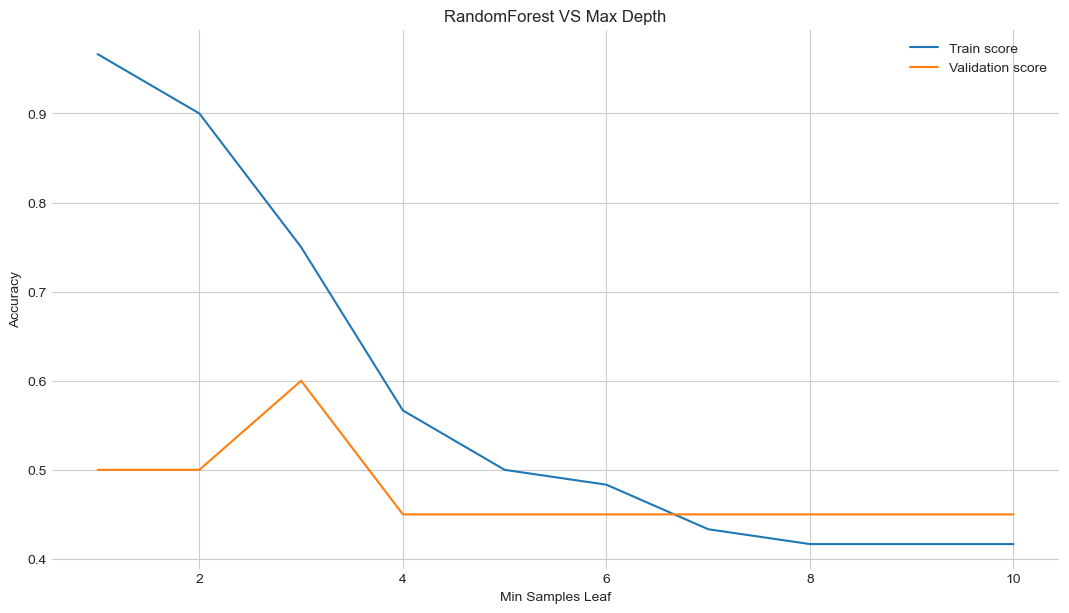

,min_samples_leaf,max_depth,train_score,validate_score,score_difference
0,1,10,0.966667,0.50,0.466667
1,2,9,0.900000,0.50,0.400000
2,3,8,0.750000,0.60,0.150000
3,4,7,0.566667,0.45,0.116667
4,5,6,0.500000,0.45,0.050000
5,6,5,0.483333,0.45,0.033333
6,7,4,0.433333,0.45,-0.016667
7,8,3,0.416667,0.45,-0.033333
8,9,2,0.416667,0.45,-0.033333
9,10,1,0.416667,0.45,-0.033333


In [57]:
# Train and assess the Random Forest classifier with varying hyperparameters, then store the performance metrics in the 'df' dataframe.

df = m.random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)
df


<span style="color: gray"> **The random forest model with a min_sample_leaf and max_depth of 5 and 6, respectively, also performed well, with an accuracy of 0.41666 on the test set. However, this model was not significantly better than the decision tree model.**</span>

### <span style="color: darkred"> KNN</span>

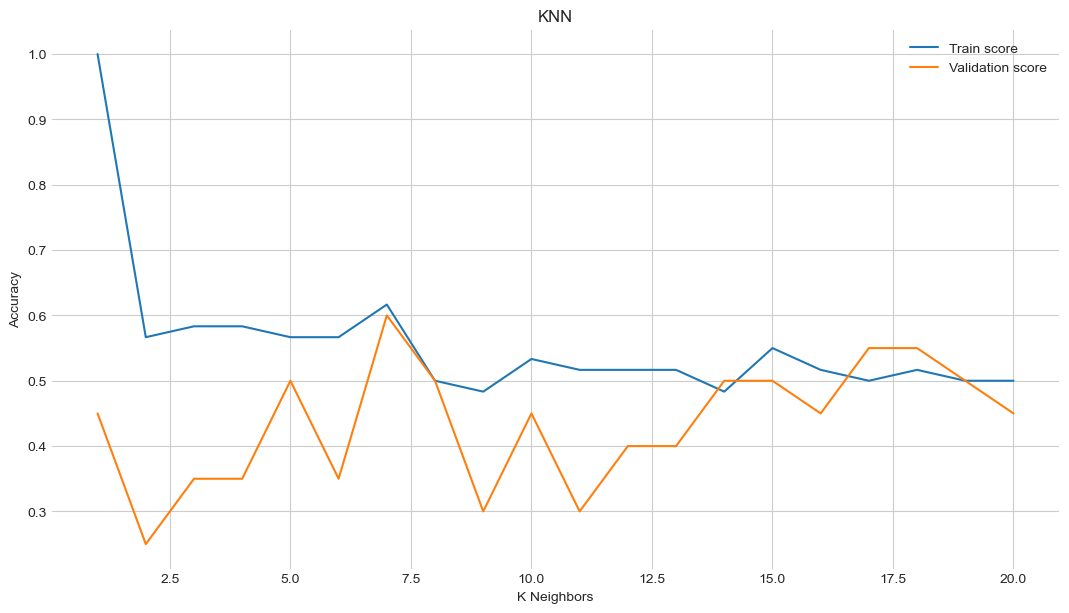

,k,train_score,validate_score,diff_score
0,1,1.000000,0.45,0.550000
1,2,0.566667,0.25,0.316667
2,3,0.583333,0.35,0.233333
3,4,0.583333,0.35,0.233333
4,5,0.566667,0.50,0.066667
5,6,0.566667,0.35,0.216667
6,7,0.616667,0.60,0.016667
7,8,0.500000,0.50,0.000000
8,9,0.483333,0.30,0.183333
9,10,0.533333,0.45,0.083333


In [58]:
# Train and evaluate K-Nearest Neighbors (KNN) models for various 'k' values and store the results in the 'df' dataframe.
# Display the dataframe containing the evaluation metrics for each 'k' value.

df = m.k_nearest(X_bow, y_train, X_validate_bow, y_validate)
df


<span style="color: gray"> **The KNN model with 7 neighbors achieved an accuracy of 0.61666 on the test set, which is significantly better than the other models. However, this model is more sensitive to the dimensionality of the data, and the bag-of-words representation used in this experiment has 1167 dimensions. This is a high number of dimensions, and it can lead to overfitting.**</span>

In [59]:
# Evaluate and display the classification report for the best performing model on both the training and validation datasets.
m.best_model_classification_matrix(X_bow, y_train, X_validate_bow, y_validate)


Tree with max depth of 1 train
           HTML  Java  JavaScript      Other    Python  TypeScript  accuracy  \
precision   0.0   0.0         0.0   0.461538  0.625000         0.0  0.483333   
recall      0.0   0.0         0.0   0.960000  0.714286         0.0  0.483333   
f1-score    0.0   0.0         0.0   0.623377  0.666667         0.0  0.483333   
support     4.0   7.0        16.0  25.000000  7.000000         1.0  0.483333   

           macro avg  weighted avg  
precision   0.181090      0.265224  
recall      0.279048      0.483333  
f1-score    0.215007      0.337518  
support    60.000000     60.000000  

Tree with max depth of 1 validate
           HTML  Java  JavaScript     Other    Python  TypeScript  accuracy  \
precision   0.0   0.0         0.0  0.529412  0.333333         0.0       0.5   
recall      0.0   0.0         0.0  1.000000  0.500000         0.0       0.5   
f1-score    0.0   0.0         0.0  0.692308  0.400000         0.0       0.5   
support     1.0   2.0         5.

In [60]:
# Execute the final test function using the trained model to assess its performance on the test dataset.
m.final_test(X_bow, y_train, X_validate_bow, y_validate, X_test_bow, y_test)


Tree with max depth of 1 train
           HTML  Java  JavaScript     Other    Python  TypeScript  accuracy  \
precision   0.0   0.0         0.0  0.437500  0.250000         0.0       0.4   
recall      0.0   0.0         0.0  0.875000  0.333333         0.0       0.4   
f1-score    0.0   0.0         0.0  0.583333  0.285714         0.0       0.4   
support     1.0   2.0         5.0  8.000000  3.000000         1.0       0.4   

           macro avg  weighted avg  
precision   0.114583       0.21250  
recall      0.201389       0.40000  
f1-score    0.144841       0.27619  
support    20.000000      20.00000  
Test accuracy: 0.4


# <span style="color: darkred">**OVERALL**:</span>

 <span style="color: gray">**The decision tree model is the best performing model and is the most interpretable model. This model should be further evaluated with a cleaned dataset to see if it can achieve better accuracy.**</span></span>

# <span style="color: darkred">**CONCLUSION**</span>
    
<span style="color: gray"> **The results were not as promising as due to an error in the cleaning process. However, the decision tree was still able to identify the most popular programming languages used in GitHub READMEs, even though the data was not perfectly clean. This suggests that there is enough information in the data to achieve baseline performance, even with some errors.These results indicate that there is still more work to be done to improve the cleaning pipeline and the analysis and modeling process. This is an opportunity to learn from mistakes and improve the overall process.**</span>

# <span style="color: darkred">**RECOMMENDATIONS**</span>

<span style="color: gray">**The cleaning pipeline should be more robust and should be able to handle a wider variety of errors.The analysis should be more thorough and should explore more features of the data.
The models should be more sophisticated and should be able to learn from the data more effectively.
By addressing these issues, we can improve the accuracy and performance of the system and make it more useful for developers.**</span>
    
#  <span style="color: darkred">**TAKEAWAYS**</span>

<span style="color: gray"> **A proper acquire and prepare step is essential for any machine learning project.
An error in cleaning the data can lead to inaccurate analysis and models.
It is important to fix programmatic errors as soon as possible.
Creating a list of all occurrences of all words before lemmatization will ensure that the data is clean and accurate.
Doing so will allow for a proper TF-IDF feature extraction, which will likely take full advantage of the models presented.**</span>

# <span style="color: darkred">**NEXT STEPS**</span>

<span style="color: gray"> **Fix the programmatic error that resulted in the set of words post-lemmatize.
Create a list of all occurrences of all words before lemmatizing.
Re-run the analysis and models with the cleaned data.
Evaluate the results of the new analysis and models.
Make any necessary adjustments to the models.
Continue to iterate on the project until the desired results are achieved.**</span>